In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/anime_reviews.csv')
print(reviews.head(10))
print(f'Shape:{reviews.shape}')
print(reviews.info())

                title  rank  score             tags  \
0  Shingeki_no_Kyojin     1   8.54      Recommended   
1  Shingeki_no_Kyojin     1   8.54      Recommended   
2  Shingeki_no_Kyojin     1   8.54   Mixed Feelings   
3  Shingeki_no_Kyojin     1   8.54      Recommended   
4  Shingeki_no_Kyojin     1   8.54      Recommended   
5  Shingeki_no_Kyojin     1   8.54   Mixed Feelings   
6  Shingeki_no_Kyojin     1   8.54      Recommended   
7  Shingeki_no_Kyojin     1   8.54   Mixed Feelings   
8  Shingeki_no_Kyojin     1   8.54  Not Recommended   
9  Shingeki_no_Kyojin     1   8.54      Recommended   

                                              review  
0  Oh dear Shingeki no Kyojin, where do I even be...  
1  Attack on Titan Review:\n\r\nI was well aware ...  
2  Why Shingeki no Kyojin might not be the epic y...  
3  (This is my first review, so bear with me.) \n...  
4  Well, I bought into the hype. This show lives ...  
5  "Shingeki no Kyojin" or "Attack on Titan" (AOT...  
6  This i

In [ ]:
x = ['title','rank','score','review','tags']
df = reviews[x]

In [ ]:
df.rename(columns={"tags":"sentiment"},inplace=True)

In [ ]:
def categorize_tags(tag):
    if 'Not Recommended' in tag:
        return 'Not Recommended'
    elif 'Recommended' in tag:
        return 'Recommended'
    elif 'Mixed Feelings' in tag:
        return 'Mixed Feelings'
    else:
        return None  # If none of the conditions are met

# Apply the categorization function to create a new column 'category'
df['category'] = df['sentiment'].apply(categorize_tags)

In [ ]:
df.drop(columns={'sentiment'},inplace=True)
df.head(5)

,title,rank,score,review,category
0,Shingeki_no_Kyojin,1,8.54,"Oh dear Shingeki no Kyojin, where do I even be...",Recommended
1,Shingeki_no_Kyojin,1,8.54,Attack on Titan Review:\n\r\nI was well aware ...,Recommended
2,Shingeki_no_Kyojin,1,8.54,Why Shingeki no Kyojin might not be the epic y...,Mixed Feelings
3,Shingeki_no_Kyojin,1,8.54,"(This is my first review, so bear with me.) \n...",Recommended
4,Shingeki_no_Kyojin,1,8.54,"Well, I bought into the hype. This show lives ...",Recommended


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# !pip install numpy==1.25.0

In [ ]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

stop_words = set(stopwords.words('english'))

# Remove stopwords from title
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Remove title from review by string matching
reviews['review'] = reviews.apply(lambda row: row['review'].replace(row['title'], ''), axis=1)

df['title'] = df['title'].apply(remove_stopwords)



In [ ]:
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# nltk.download('punkt')

# Assume 'reviews' is a list of preprocessed documents
# Make sure you have 'gensim' and 'nltk' installed: pip install gensim nltk

# Tokenize and remove stopwords
tokenized_reviews = [word_tokenize(review) for review in reviews]
stop_words = set(stopwords.words('english'))
tokenized_reviews = [[word for word in review if word.lower() not in stop_words] for review in tokenized_reviews]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_reviews)

# Convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(review) for review in tokenized_reviews]

# Build the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic #{idx}: {topic}')

# To get the topics for a specific document
doc = tokenized_reviews[0]
bow = dictionary.doc2bow(doc)
print(lda_model[bow])


Topic #0: 0.600*"score" + 0.100*"rank" + 0.100*"title" + 0.100*"review" + 0.100*"tags"
Topic #1: 0.200*"title" + 0.200*"review" + 0.200*"rank" + 0.200*"tags" + 0.200*"score"
Topic #2: 0.200*"rank" + 0.200*"title" + 0.200*"review" + 0.200*"tags" + 0.200*"score"
Topic #3: 0.400*"review" + 0.400*"rank" + 0.067*"title" + 0.067*"tags" + 0.067*"score"
Topic #4: 0.400*"tags" + 0.400*"title" + 0.067*"rank" + 0.067*"review" + 0.067*"score"
[(0, 0.100037694), (1, 0.10010342), (2, 0.10010336), (3, 0.100022845), (4, 0.5997327)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


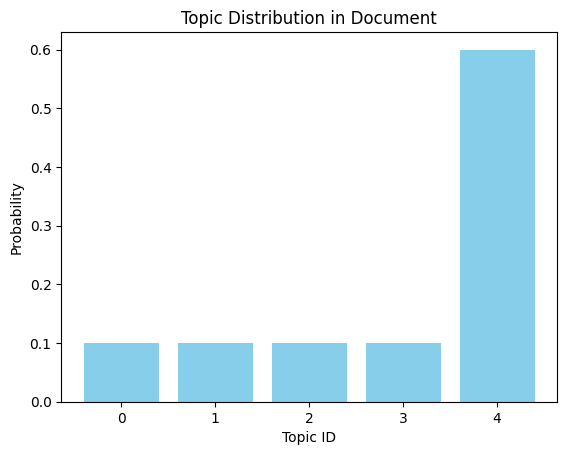

In [ ]:
import matplotlib.pyplot as plt

# To get the topics for a specific document
doc = tokenized_reviews[0]
bow = dictionary.doc2bow(doc)
topics_distribution = lda_model[bow]

# Extract topic probabilities
topic_ids, topic_probs = zip(*topics_distribution)

# Create a bar plot
plt.bar(topic_ids, topic_probs, color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Probability')
plt.title('Topic Distribution in Document')
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic #0: ['like', 'character', 'show', 'even', 'game', 'one', 'characters', 'arc', 'kirito', 'love']
Topic #1: ['show', 'characters', 'series', 'one', 'character', 'anime', 'story', 'like', 'plot', 'well']
Topic #2: ['season', 'anime', 'like', 'one', 'characters', 'story', 'good', 'character', 'really', 'show']
Topic #3: ['one', 'movie', 'human', 'death', 'world', 'life', 'away', 'story', 'people', 'also']
Topic #4: ['anime', 'characters', 'story', 'like', 'show', 'really', 'character', 'one', 'good', 'well']


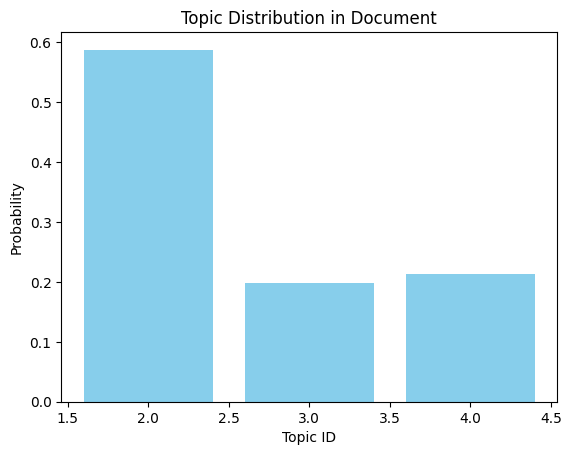

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim import corpora, models
import matplotlib.pyplot as plt

# Preprocess text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return tokens

# Apply text preprocessing to the 'review' column
df['processed_review'] = df['review'].apply(preprocess_text)

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['processed_review'])

# Convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(review) for review in df['processed_review']]

# Build the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Visualize the topics
topics_distribution = lda_model.show_topics(num_topics=5, num_words=10, formatted=False)
for topic_id, topic_words in topics_distribution:
    words = [word[0] for word in topic_words]
    print(f'Topic #{topic_id}: {words}')

# Create a bar plot for the first document's topic distribution
doc_bow = corpus[0]
doc_topics = lda_model[doc_bow]
topic_ids, topic_probs = zip(*doc_topics)

plt.bar(topic_ids, topic_probs, color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Probability')
plt.title('Topic Distribution in Document')
plt.show()
